In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
print(train.shape)
print(test.shape)
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [8]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_full = pd.concat([train, test], axis=0, sort=False)
print(df_full.shape)
df_full.describe()

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas_profiling as pdp
display(pdp.__version__)
pdp.ProfileReport(train)

'2.5.0'

In [14]:
age = train["Age"]
age = [x for x in age if not np.isnan(x)]
display(sorted(age)[:10])

[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0]

In [15]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.3 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-py3-none-any.whl size=4118720 sha256=a16aee95b0e5d3cb4bc60d791c9ff9161d5bcb45d6159a028565c88fa437ae19
  Stored in directory: /root/.cache/pip/wheels/0d/1a/0c/3612a5e3227481d4a1dd3566228e3ffe57d608b2b7c08595be
Successfully built japanize-matplotlib


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# 本文と同様に青３色の色にする場合
# sns.set_palette("Blues_r", 3) # 青３色のスタイル

In [60]:
# fontsizeの設定
plt.rcParams["font.size"] = 18

# サイズの設定
plt.rcParams['figure.figsize'] = (10.0, 6.0)

## 1. 死亡者と生存者

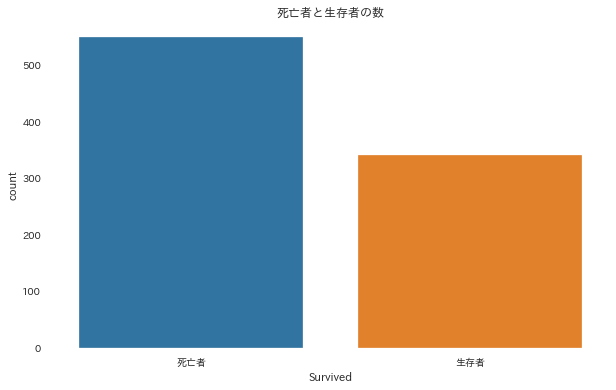

In [64]:
# x軸にカラム(Survived)、用いるDFをtrainに指定している
sns.countplot(x='Survived', data=train)
# titleつけた
plt.title('死亡者と生存者の数')
# 各列について名前をつける
plt.xticks([0,1],['死亡者', '生存者'])
# 表示
plt.show()

In [43]:
# 死亡者と生存者数を表示する
display(train['Survived'].value_counts())

# 死亡者と生存者割合を表示する
display(train['Survived'].value_counts()/len(train['Survived']))

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## 2. 性別

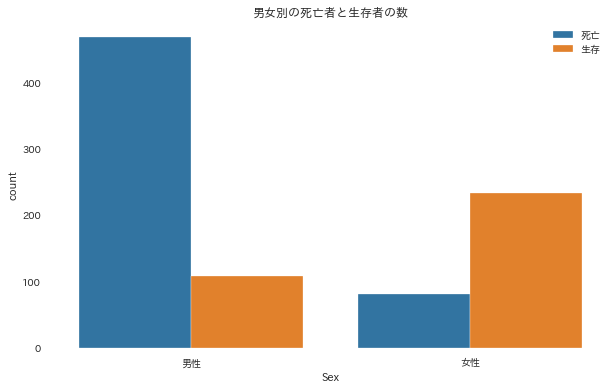

In [63]:
# X軸のカラムをSex,比較対象をSurvived(hue)として比較している。DFはtrain
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('男女別の死亡者と生存者の数')
# 凡例を表示
plt.legend(['死亡','生存'])
plt.xticks([0,1],['男性', '女性'])
plt.show()

### 性別 × 死亡者と生存者

In [53]:
# SexとSurvivedをクロス集計する
display(pd.crosstab(train['Sex'], train['Survived']))

# クロス集計しSexごとに正規化する(female,maleごとに生死の割合を出す)
display(pd.crosstab(train['Sex'], train['Survived'], normalize = 'index'))

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


## 3. チケットクラス

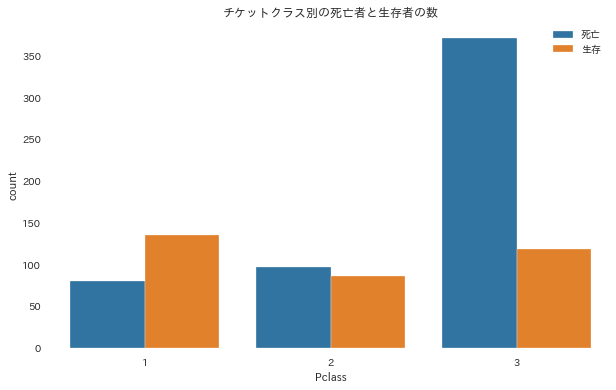

In [62]:
# チケットクラス別の生存者数を可視化
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('チケットクラス別の死亡者と生存者の数')
# 凡例を表示
plt.legend(['死亡','生存'])
plt.show()

### チケットクラス × 死亡者と生存者

In [56]:
# PclassとSurvivedをクロス集計する
display(pd.crosstab(train['Pclass'], train['Survived']))

# クロス集計しPclassごとに正規化する
display(pd.crosstab(train['Pclass'], train['Survived'], normalize='index'))

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## 4. 年齢の分布

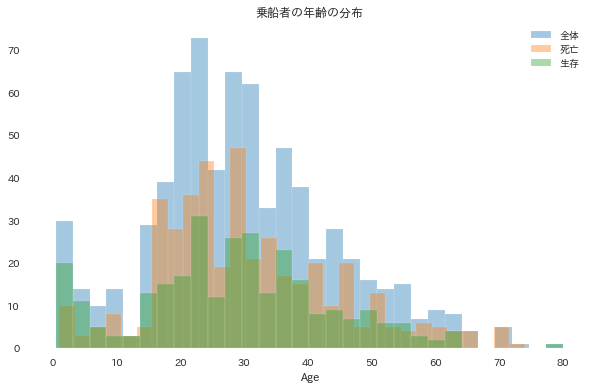

In [74]:
# 全体のヒストグラム dropna()で欠損値を除外 kdeは線を表示しない(ヒストグラムを表示しないならhist) binsはヒストグラムの棒の本数
sns.distplot(train['Age'].dropna(), kde=False, bins=30, label='全体')

# 死亡者のヒストグラム
sns.distplot(train[train['Survived'] == 0].Age.dropna(), kde=False, bins=30, label='死亡')

# 生存者のヒストグラム
sns.distplot(train[train['Survived'] == 1].Age.dropna(), kde=False, bins=30, label='生存')

plt.title('乗船者の年齢の分布') # タイトル
plt.legend(); # 凡例を表示

### 年齢分布 × 死亡者と生存者

In [75]:
# 年齢を８等分し、CategoricalAgeという変数を作成 pandasのcutメソッドでわけれるんだ！w
train['CategoricalAge'] = pd.cut(train['Age'], 8)

# CategoricalAgeとSurvivedをクロス集計する
display(pd.crosstab(train['CategoricalAge'], train['Survived']))

# クロス集計しCategoricalAgeごとに正規化する
display(pd.crosstab(train['CategoricalAge'], train['Survived'], normalize='index'))

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.406250,0.593750
"(10.368, 20.315]",0.617391,0.382609
"(20.315, 30.263]",0.634783,0.365217
"(30.263, 40.21]",0.554839,0.445161
"(40.21, 50.158]",0.616279,0.383721
"(50.158, 60.105]",0.595238,0.404762
"(60.105, 70.052]",0.764706,0.235294
"(70.052, 80.0]",0.800000,0.200000


## 5. タイタニック号に乗っている兄弟・配偶者の数

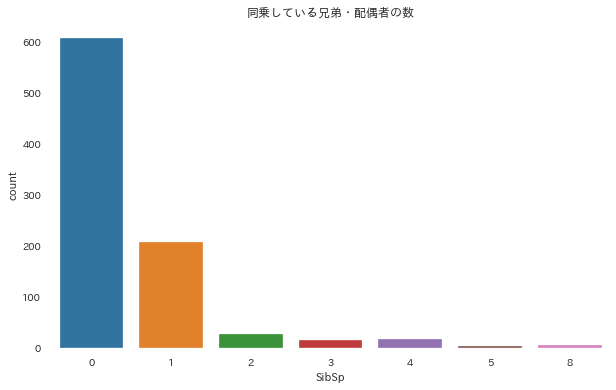

In [76]:
sns.countplot(x='SibSp', data = train)
plt.title('同乗している兄弟・配偶者の数');

### 兄弟・配偶者の数のデータをスリムに

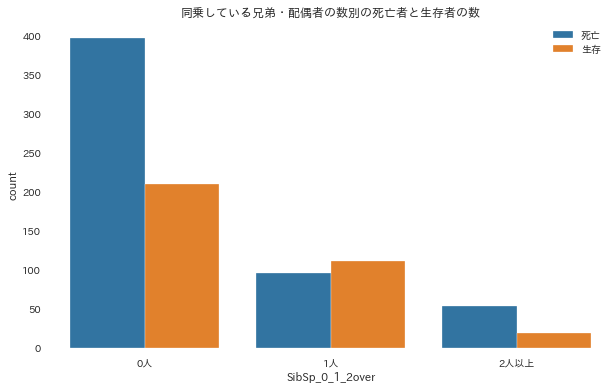

In [77]:
# SibSpが0か1であればそのまま、2以上であれば2である特徴量SibSp_0_1_2overを作成
train['SibSp_0_1_2over'] = [i if i <=1 else 2 for i in train['SibSp']]

# SibSp_0_1_2overごとに集計し、可視化 
sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=train)
plt.legend(['死亡', '生存'])
plt.xticks([0,1,2], ['0人', '1人', '2人以上'])
plt.title('同乗している兄弟・配偶者の数別の死亡者と生存者の数')
plt.show()

### 兄弟・配偶者 × 死亡者と生存者

In [78]:
# SibSpとSurvivedをクロス集計する
display(pd.crosstab(train['SibSp_0_1_2over'], train['Survived']))

# クロス集計しSibSpごとに正規化する
display(pd.crosstab(train['SibSp_0_1_2over'], train['Survived'], normalize='index'))

Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


## 6. タイタニック号に乗っている両親・子供の数

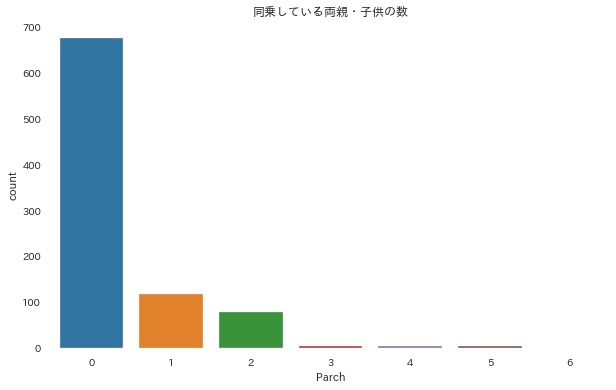

In [80]:
sns.countplot(x='Parch', data = train)
plt.title('同乗している両親・子供の数');

### 両親・子供の数のデータをスリムに

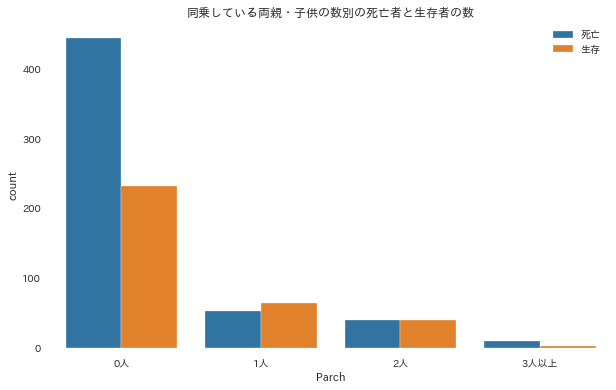

In [81]:
# 2以下であればそのままの数、3以上は3という変換を行う
train['Parch_0_1_2_3over'] = [i if i <=2 else 3 for i in train['Parch']]

# Parch_0_1_2_3overごとに集計し可視化
sns.countplot(x='Parch_0_1_2_3over',hue='Survived', data = train)
plt.title('同乗している両親・子供の数別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.xticks([0, 1, 2, 3], ['0人', '1人', '2人', '3人以上'])
plt.xlabel('Parch')
plt.show()

### 両親・子供の数　× 死亡者と生存者

In [82]:
# ParchとSurvivedをクロス集計する
display(pd.crosstab(train['Parch_0_1_2_3over'], train['Survived']))

# クロス集計しParchごとに正規化する
display(pd.crosstab(train['Parch_0_1_2_3over'], train['Survived'], normalize='index'))

Survived,0,1
Parch_0_1_2_3over,,
0,445,233
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_0_1_2_3over,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


## 7. １人で乗船しているか２人以上で乗船しているか

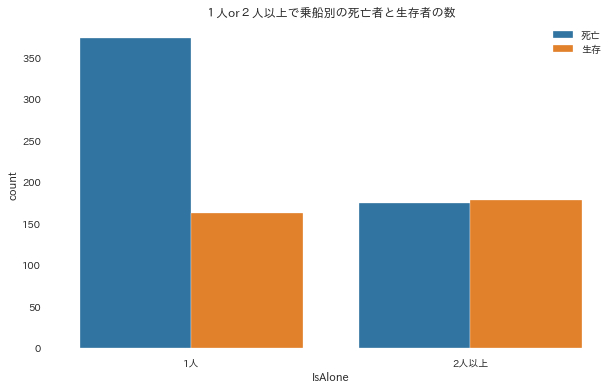

In [85]:
#SibSpとParchが同乗している家族の数。1を足すと家族の人数となる
train['FamilySize']=train['SibSp']+ train['Parch']+ 1

# IsAloneを0とし、2行目でFamilySizeが2以上であれば1にしている
train['IsAlone'] = 0
train.loc[train['FamilySize'] >= 2, 'IsAlone'] = 1

# IsAloneごとに可視化
sns.countplot(x='IsAlone', hue = 'Survived', data = train)
plt.xticks([0, 1], ['1人', '2人以上'])

plt.legend(['死亡', '生存'])
plt.title('１人or２人以上で乗船別の死亡者と生存者の数')
plt.show()

In [88]:
# IsAloneとSurvivedをクロス集計する
display(pd.crosstab(train['IsAlone'], train['Survived']))

# クロス集計しIsAloneごとに正規化する
display(pd.crosstab(train['IsAlone'], train['Survived'], normalize='index'))

Survived,0,1
IsAlone,,
0,374,163
1,175,179


Survived,0,1
IsAlone,,
0,0.696462,0.303538
1,0.494350,0.505650


## 8. 運賃の分布

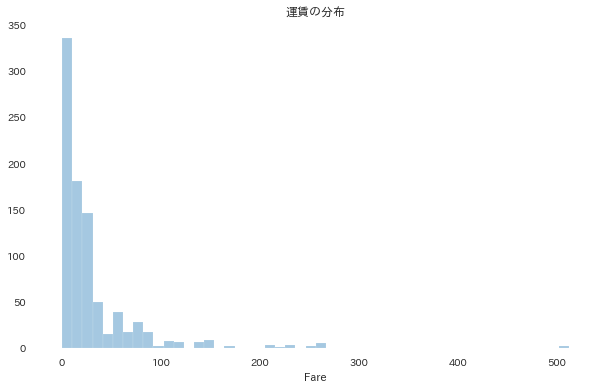

In [92]:
sns.distplot(train['Fare'].dropna(), kde=False)
plt.title('運賃の分布');

### 運賃 × 死亡者と生存者 (qcut使って量的データ分割&各平均)

In [122]:
# qcutはcutと違って値で分割するのではなく、データの量で分割する！
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
display(train['CategoricalFare'].value_counts())
display(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

# CategoricalFareとSurvivedをクロス集計する
display(pd.crosstab(train['CategoricalFare'], train['Survived']))

# クロス集計しCategoricalFareごとに正規化する
display(pd.crosstab(train['CategoricalFare'], train['Survived'], normalize='index'))

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: CategoricalFare, dtype: int64

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.802691,0.197309
"(7.91, 14.454]",0.696429,0.303571
"(14.454, 31.0]",0.545045,0.454955
"(31.0, 512.329]",0.418919,0.581081


## 9. 名前

In [126]:
display(train[['Name']].head(10))

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [152]:
# 敬称を抽出し、重複を省く setで重複を避ける extractで正規表現による分割 ()は必須？ 左から空白+文字+1以上連続する+.をエスケープで一致 expandでシリーズで出力(カラムは１つなので)
set(train.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [153]:
# 敬称をcountする value_countsでindexごとの合計数が出せる
train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Jonkheer      1
Countess      1
Sir           1
Mme           1
Lady          1
Don           1
Capt          1
Name: Name, dtype: int64

In [154]:
# df_trainにTitle列を作成、Title列の値は敬称
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# df_trainのTitle列の値ごとに平均値を算出
train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [155]:
# 変換するための関数を作成
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5

# testにもtitle列を作成
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# リスト内包表記を用いて変換
train['Title_num'] = [title_to_num(i) for i in train['Title']]
test['Title_num'] = [title_to_num(i) for i in test['Title']]

In [ ]:
display(train.head())